In [106]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2

%matplotlib inline

In [107]:
image = mpimg.imread("exit-ramp.jpg")
gray = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

In [108]:
xsize = image.shape[1]
ysize = image.shape[0]

print(xsize, ysize)

960 540


In [109]:
# Canny Edge Detection

kernel_size = 5
blur_gray = cv2.GaussianBlur(gray, (kernel_size, kernel_size), 0)

# define our parameters for Canny and apply
low_threshold = 50
high_threshold = 150
edges = cv2.Canny(blur_gray, low_threshold, high_threshold)

<function matplotlib.pyplot.show>

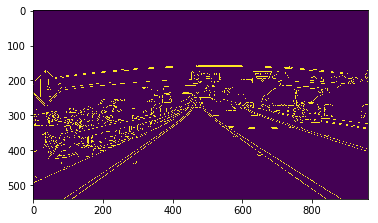

In [110]:
plt.imshow(edges)
plt.show

In [111]:
# Create masked edges

mask = np.zeros_like(edges)
ignore_mask_color = 255

imshape = image.shape
vertices = np.array([[(0,imshape[0]),(0, 0), (imshape[1], 0), (imshape[1],imshape[0])]], dtype=np.int32)
print(vertices)
cv2.fillPoly(mask, vertices, ignore_mask_color)
masked_edges = cv2.bitwise_and(edges, mask)

[[[  0 540]
  [  0   0]
  [960   0]
  [960 540]]]


In [112]:
masked_edges

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [113]:
rho = 1 # distance resolution in pixels of the Hough grid
theta = np.pi/180 # angular resolution in radians of the Hough grid
threshold = 1     # minimum number of votes (intersections in Hough grid cell)
min_line_length = 5 #minimum number of pixels making up a line
max_line_gap = 1    # maximum gap in pixels between connectable line segments
line_image = np.copy(image)*0 

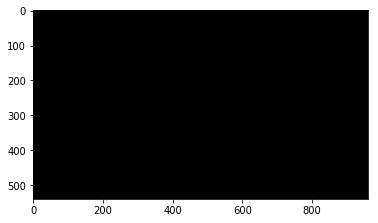

In [114]:
plt.imshow(line_image)
plt.show()

In [115]:
lines = cv2.HoughLinesP(masked_edges, rho, theta, threshold, np.array([]),
                            min_line_length, max_line_gap)

In [116]:
lines

array([[[ 21, 248,  21, 197]],

       [[740, 469, 764, 487]],

       [[571, 158, 627, 159]],

       ...,

       [[199, 478, 204, 474]],

       [[418, 199, 423, 199]],

       [[  0, 238,   5, 243]]], dtype=int32)

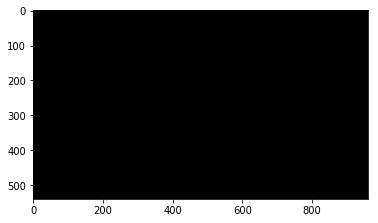

In [117]:
plt.imshow(line_image)
plt.show()

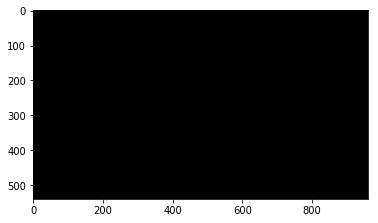

In [118]:
plt.imshow(line_image)
plt.show()

In [119]:
left_bottom = [40, 539]
right_bottom = [900, 600]
apex = [450, 300]
fit_left = np.polyfit((left_bottom[0], apex[0]), (left_bottom[1], apex[1]), 1)
fit_right = np.polyfit((right_bottom[0], apex[0]), (right_bottom[1], apex[1]), 1)
fit_bottom = np.polyfit((left_bottom[0], right_bottom[0]), (left_bottom[1], right_bottom[1]), 1)

In [120]:
# red_threshold = green_threshold = blue_threshold = 200
# rgb_threshold = [red_threshold, green_threshold, blue_threshold]
# print(rgb_threshold)

# # for finding lanes
# color_thresholds = (image[:,:,0] < rgb_threshold[0]) | \
#                     (image[:,:,1] < rgb_threshold[1]) | \
#                     (image[:,:,2] < rgb_threshold[2])

# for finding region
XX, YY = np.meshgrid(np.arange(0, xsize), np.arange(0, ysize))
region_thresholds = (YY > (XX*fit_left[0] + fit_left[1])) & \
                    (YY > (XX*fit_right[0] + fit_right[1])) & \
                    (YY < (XX*fit_bottom[0] + fit_bottom[1]))

In [128]:
region_thresholds

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [133]:
line_image[region_thresholds]

array([[  0,   0,   0],
       [255,   0,   0],
       [  0,   0,   0],
       ...,
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0]], dtype=uint8)

In [121]:
for line in lines:
    for x1,y1,x2,y2 in line:
        cv2.line(line_image,(x1,y1),(x2,y2),(255,0,0),10)

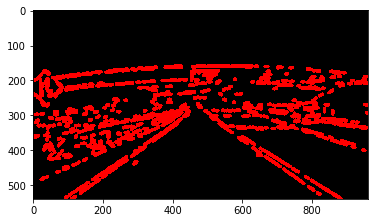

In [122]:
plt.imshow(line_image)
plt.show()

In [123]:
# line_image[~color_thresholds & region_thresholds] = [0, 0, 0]
# plt.imshow(line_image)
# plt.show()

In [124]:
color_edges = np.dstack((edges, edges, edges)) 

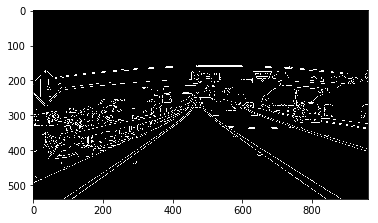

In [125]:
plt.imshow(color_edges)
plt.show()

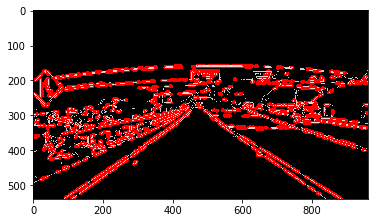

In [126]:
lines_edges = cv2.addWeighted(color_edges, 0.8, line_image, 1, 0) 
plt.imshow(lines_edges)


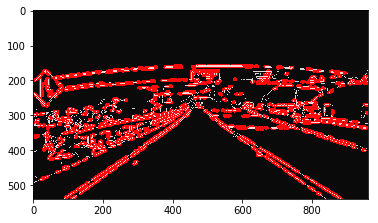

In [127]:
lines_edges = cv2.addWeighted(color_edges, .8, line_image, 10, 10)
plt.imshow(lines_edges)
plt.show()